<a href="https://colab.research.google.com/github/rmogi/HousePrice/blob/branch-furusawa/furusawa/HousePrices_xgboost_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


カラムメモ

データフィールド 以下は、データ記述ファイルにあるものの簡単なバージョンです。

SalePrice-プロパティ(土地、住宅)のドルでの販売価格。これは、予測しようとしているターゲット変数です。

MSSubClass：建物クラス

MSZoning：一般的なゾーニング分類

LotFrontage：プロパティ(土地、住宅)に接続された道路の線形フィート

LotArea：平方フィート単位のロットサイズ(土地の大きさ)

Street(ストリート)：道路アクセスのタイプ

Alley(路地)：路地アクセスのタイプ

LotShape：プロパティ(土地、住宅)の一般的な形状

LandContour：プロパティ(土地、住宅)の平坦性

Utilities(ユーティリティ)：利用可能なユーティリティのタイプ(効用・有用)

LotConfig：ロット構成

LandSlope：プロパティ(土地、住宅)の勾配

Neighborhood(近所)：エームズ市の制限内の物理的な場所

Condition1(条件1)：幹線道路または鉄道に近接

Condition2(条件2)：幹線道路または鉄道に近接している（秒がある場合）

BldgType：住居のタイプ

HouseStyle：住居のスタイル

OverallQual：全体的な材料と仕上げの品質

OverallCond：全体的な状態の評価

YearBuilt：元の建設日

YearRemodAdd：改造日

RoofStyle：屋根のタイプ

RoofMatl：屋根のマテリアル

Exterior1st：家の外装カバー

Exterior2nd：家の外装（複数の材料の場合）

MasVnrType：石積みのベニヤのタイプ

MasVnrArea：平方フィートの石積みベニア面積

ExterQual：外装材の品質

ExterCond：外装材の現状

Foundation(財団)：財団の種類

BsmtQual：地下室の高さ

BsmtCond：地下室の一般的な状態

BsmtExposure：ストライキまたは庭園レベルの地下壁

BsmtFinType1：地下の仕上がり面積

BsmtFinSF1：タイプ1の完成した平方フィート

BsmtFinType2：2番目に終了した領域の品質（存在する場合）

BsmtFinSF2：タイプ2仕上げ済み平方フィート

BsmtUnfSF：地下室の未完成の平方フィート

TotalBsmtSF：地下面積の合計平方フィート

Heating(暖房)：暖房の種類

HeatingQC：暖房の品質と状態

CentralAir：セントラルエアコン

Electrical(電気)：電気システム

1stFlrSF：1階の平方フィート

2ndFlrSF：2階の平方フィート

LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）

GrLivArea：グレード（地上）のリビングエリアの平方フィート

BsmtFullBath：地下のフルバスルーム

BsmtHalfBath：地下半分のバスルーム

FullBath：グレードを超えるフルバスルーム(風呂)

HalfBath(ハーフバス)：グレードを超えるハーフバス

Bedroom(ベッドルーム)：地下階の上のベッドルームの数

Kitchen(キッチン)：キッチンの数

KitchenQual：キッチンの品質

TotRmsAbvGrd：グレードを超える部屋の合計（バスルームは含まれません）

Functional(機能的)：ホーム機能の評価

Fireplaces(暖炉)：暖炉の数

FireplaceQu：暖炉の品質

GarageType：ガレージの場所

GarageYrBlt：ガレージが建てられた年

GarageFinish：ガレージの内部仕上げ

GarageCars：車の容量でのガレージのサイズ

GarageArea：平方フィートで表したガレージのサイズ

GarageQual：ガレージの品質

GarageCond：ガレージの状態

PavedDrive：舗装された私道

WoodDeckSF：ウッドデッキの面積（平方フィート）

OpenPorchSF：平方フィートのオープンポーチエリア

EnclosedPorch：平方フィートで囲まれたポーチエリア

3SsnPorch：平方フィートのスリーシーズンポーチエリア

ScreenPorch：平方フィートのスクリーンポーチエリア

PoolArea：平方フィートのプール面積

PoolQC：プールの品質

Fence(フェンス)：フェンスの品質

MiscFeature：その他の機能は他のカテゴリではカバーされていません

MiscVal：その他の機能の$ Value

MoSold：販売月

YrSold：販売年

SaleType：販売のタイプ

SaleCondition：販売の条件

使用するライブラリの読み込み

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#データの読み込み
train = pd.read_csv("train.csv")
test_x = pd.read_csv("test.csv")

#学習データの変数を確認
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# トレーニングデータの確認
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# テストデータの確認
test_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


EDA(探索的データ分析)

目的変数である「SalesPrice(家の販売価格)について確認



In [6]:
#目的変数である家の価格の要約統計量を表示する
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

50%が16万なのに対して平均が18万となっている、かつmaxが75万と大きいので式分布にはなっていない

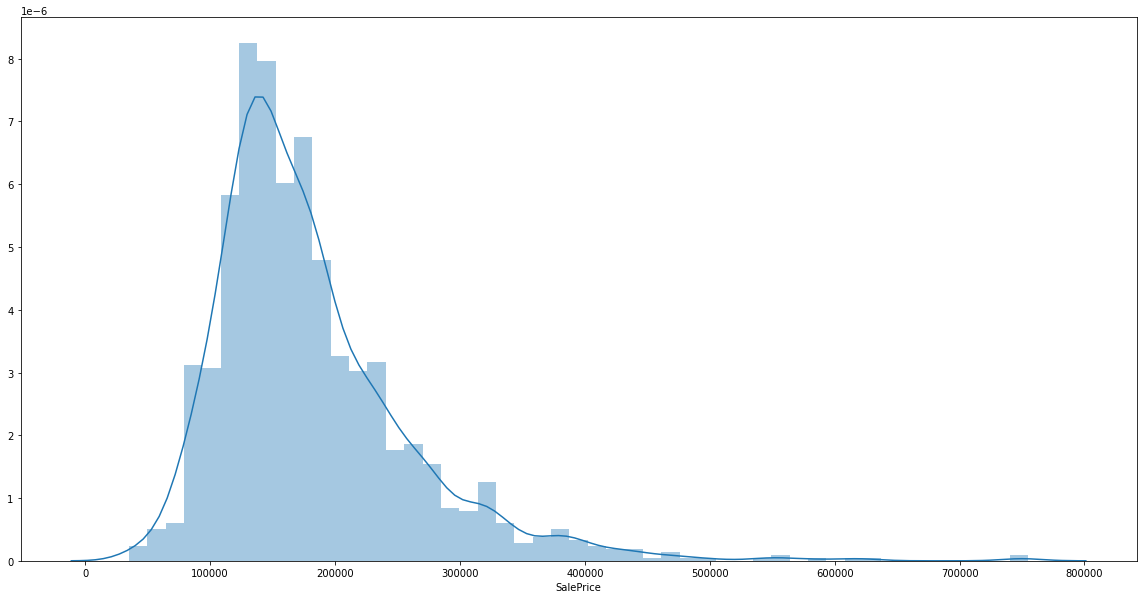

In [7]:
#目的変数である家の価格のヒストグラムを表示する
plt.figure(figsize=(20, 10))
sns.distplot(train['SalePrice'])

回帰分析の説明変数や目的変数は正規分布していなくても良いか？

回帰分析の前提

└独立性（データそれぞれが独立）

└等分散性（説明変数に関わらず分散が一定）

└正規性（誤差自体が正規分布している）

└線形性（説明変数と目的変数の関係は直線で近似できる）

独立性、等分散性、正規性の3つは、残渣が満たす必要がある。

残差プロットに特異なパターンがなければ、独立性は満たされる。

残差が均一ならば、等分散性の仮定は満たされる。

QQplotでプロットした丸が直線状にきれいに乗っていれば、残渣が正規分布しているといえる。

回帰分析の説明変数や目的変数画は正規分布していなくて良い。

正規分布している必要があるのは残差。説明変数や目的変数ではない。

In [8]:
#歪度と尖度を計算
print("歪度: %f" % train['SalePrice'].skew())
print("尖度: %f" % train['SalePrice'].kurt())

歪度: 1.882876
尖度: 6.536282


歪度が正の値なので、左に偏っている分布であること、

尖度が正の値のため正規分布よりも尖った分布であることがわかる。

物件の大きさ（広さ）

築年数

家の材質と完成度

あたりがぱっとみで物件の価格に影響しそう

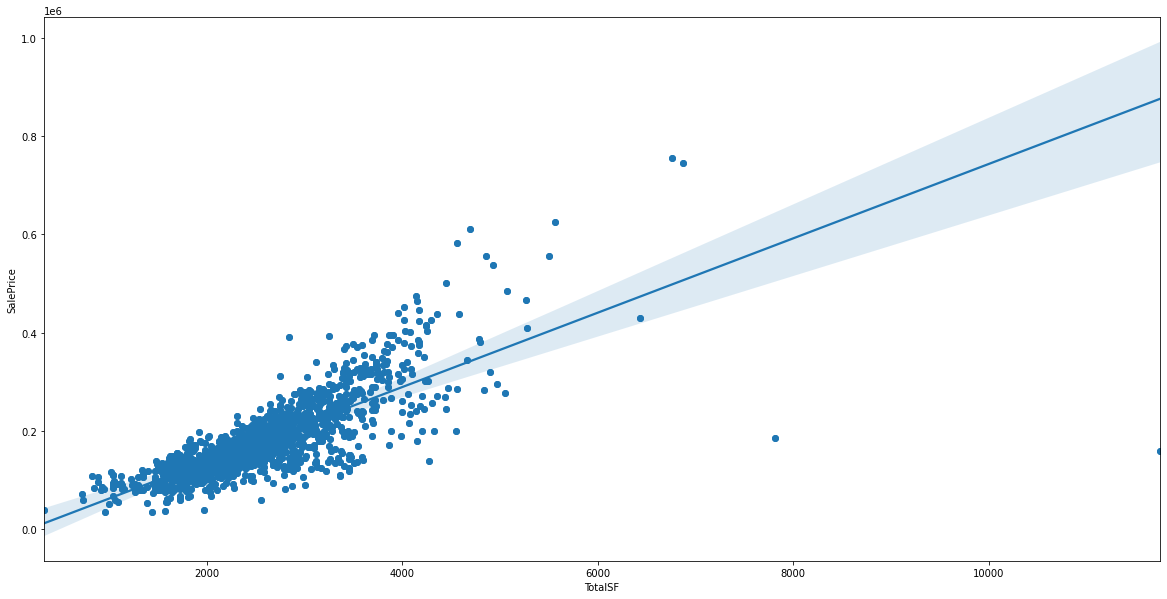

In [9]:
"""
1stFlrSF: 1階の広さ
2ndFlrSF: 2階の広さ
TotalBsmtSF: 地下の広さ
"""
#物件の広さを合計した変数を作成
train["TotalSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test_x["TotalSF"] = test_x["1stFlrSF"] + test_x["2ndFlrSF"] + test_x["TotalBsmtSF"]

#物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 10), facecolor="w")
plt.scatter(train["TotalSF"],train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.TotalSF, y=train.SalePrice)

若干外れ値はあるが、相関はしてるように見える。

物件が大きくなるほど物件価格も高くなることがわかる。

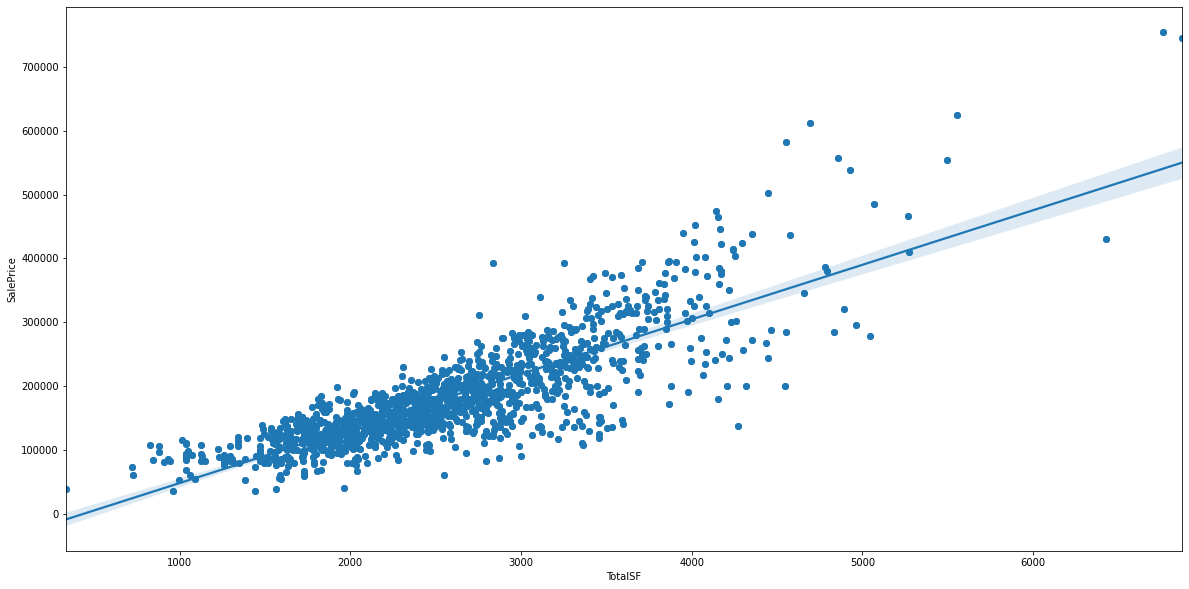

In [10]:
#外れ値を除外する
train = train.drop(train[(train['TotalSF']>7500) & (train['SalePrice']<300000)].index)

#物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 10), facecolor="w")
plt.scatter(train["TotalSF"],train["SalePrice"])
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.TotalSF, y=train.SalePrice)

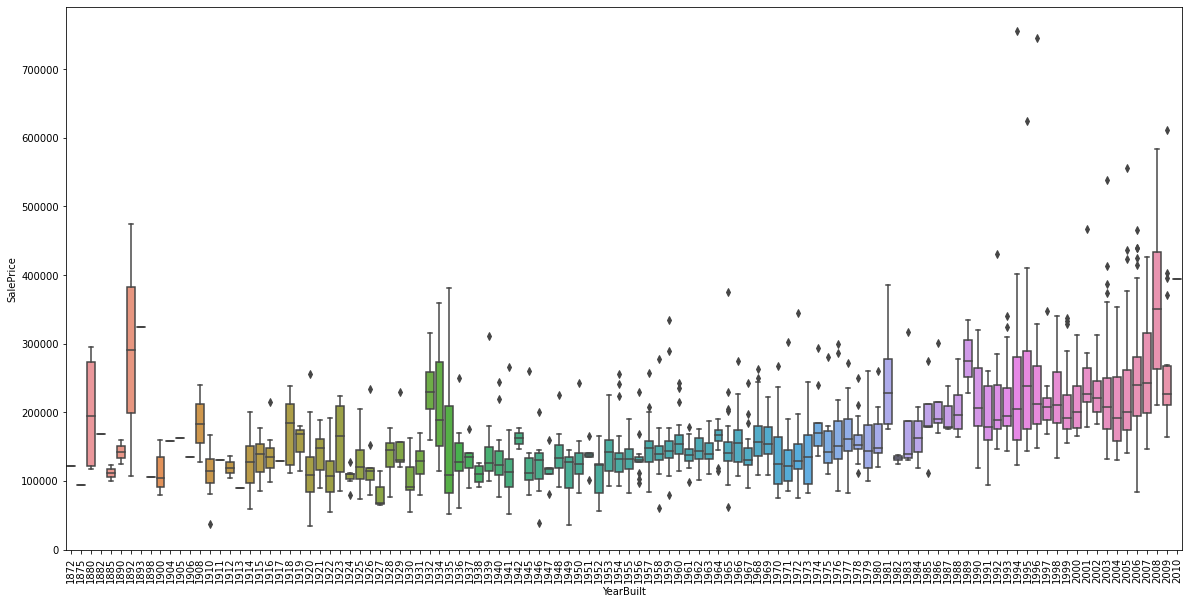

In [11]:
#築年数と物件価格の散布図を作成
data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10), facecolor="w")
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

築年数が新しいほど物件価格が高い傾向がありそう。正直微妙

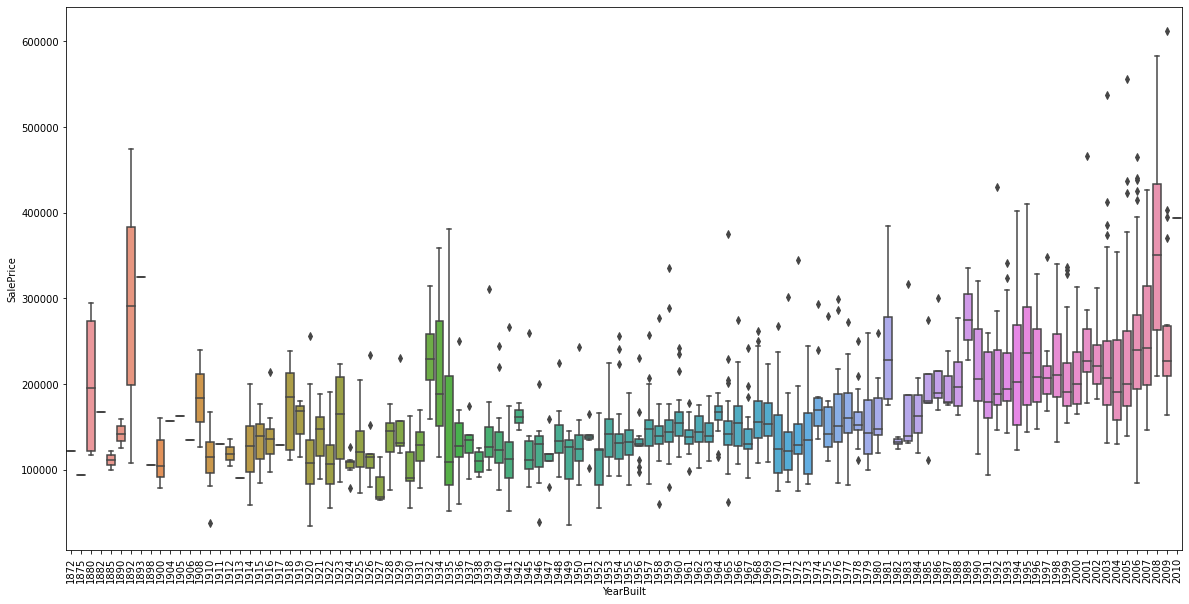

In [12]:
#外れ値を除外する
train = train.drop(train[(train['YearBuilt']<2000) & (train['SalePrice']>600000)].index)

#グラフを描画する
data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10), facecolor="w")
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

Text(0, 0.5, 'SalePrice')

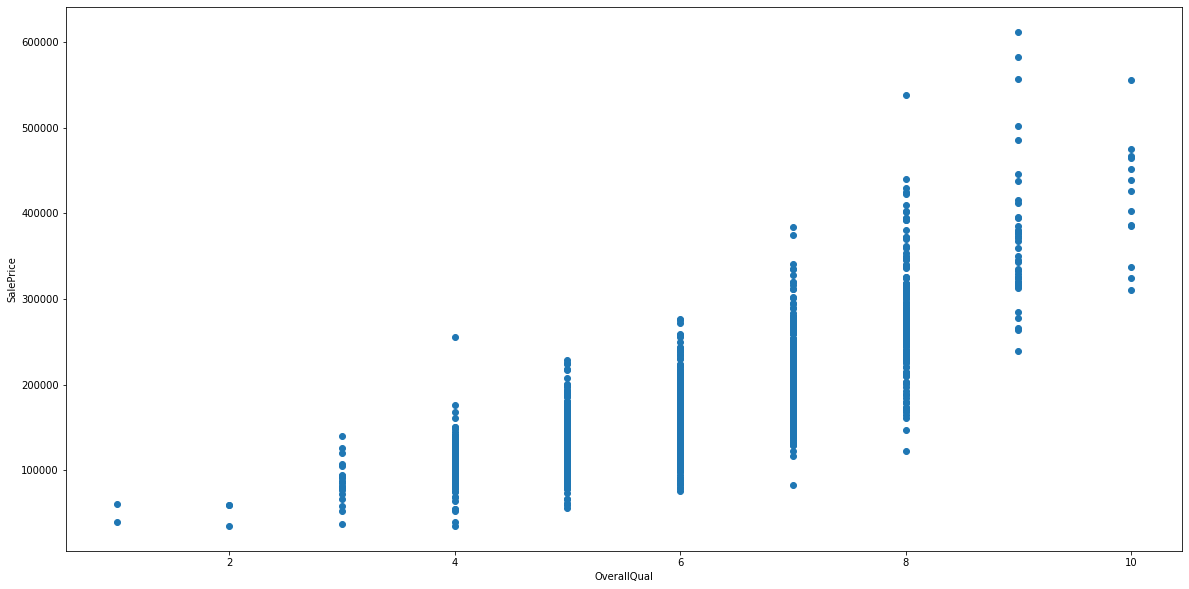

In [13]:
#家の材質・完成度と物件価格の散布図を作成
plt.figure(figsize=(20, 10), facecolor="w")
plt.scatter(train["OverallQual"],train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

クオリティが上がるほど価格が上がっているように見える。

Text(0, 0.5, 'SalePrice')

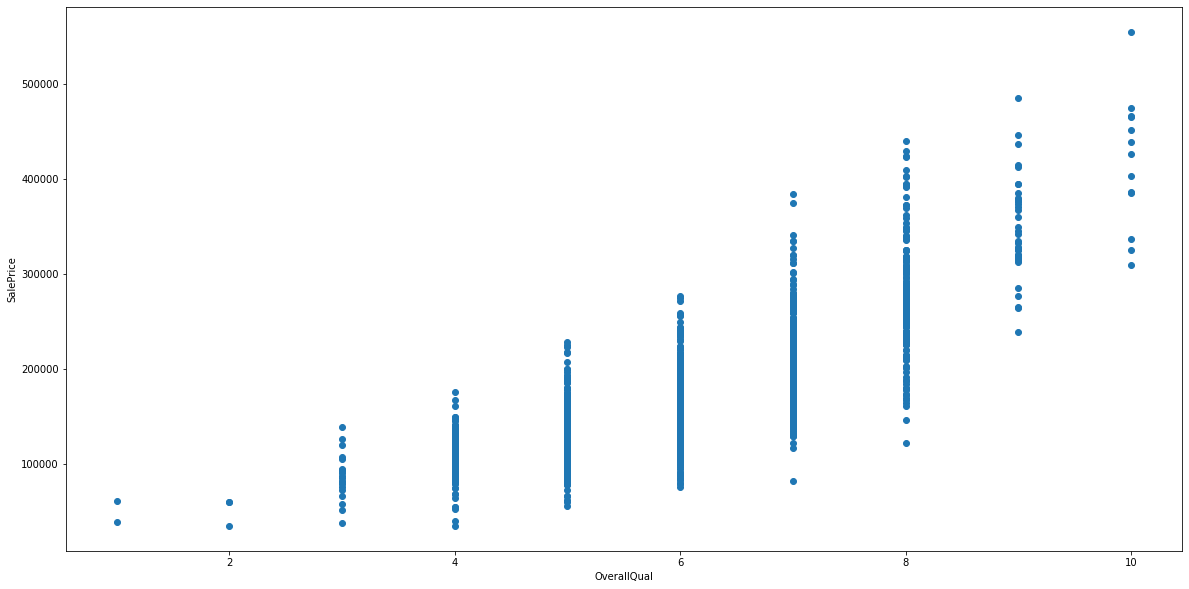

In [14]:
#外れ値を除外する
train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index)
train = train.drop(train[(train['OverallQual']<10) & (train['SalePrice']>500000)].index)

#グラフを描画する
plt.figure(figsize=(20, 10), facecolor="w")
plt.scatter(train["OverallQual"],train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

In [15]:
#学習データを目的変数とそれ以外に分ける
train_x = train.drop("SalePrice",axis=1)
train_y = train["SalePrice"]

#学習データとテストデータを統合
all_data = pd.concat([train_x,test_x],axis=0,sort=True)

#IDのカラムは不必要なので別の変数に格納
train_ID = train['Id']
test_ID = test_x['Id']

all_data.drop("Id", axis = 1, inplace = True)

#それぞれのデータのサイズを確認
print("train_x: "+str(train_x.shape))
print("train_y: "+str(train_y.shape))
print("test_x: "+str(test_x.shape))
print("all_data: "+str(all_data.shape))

train_x: (1449, 81)
train_y: (1449,)
test_x: (1459, 81)
all_data: (2908, 80)


In [16]:
#データの欠損値を確認する
all_data_na = all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
all_data_na

PoolQC          2900
MiscFeature     2803
Alley           2710
Fence           2338
FireplaceQu     1420
LotFrontage      485
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior1st        1
Electrical         1
BsmtUnfSF          1
Exterior2nd        1
TotalSF            1
GarageCars         1
KitchenQual        1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
TotalBsmtSF        1
GarageArea         1
dtype: int64

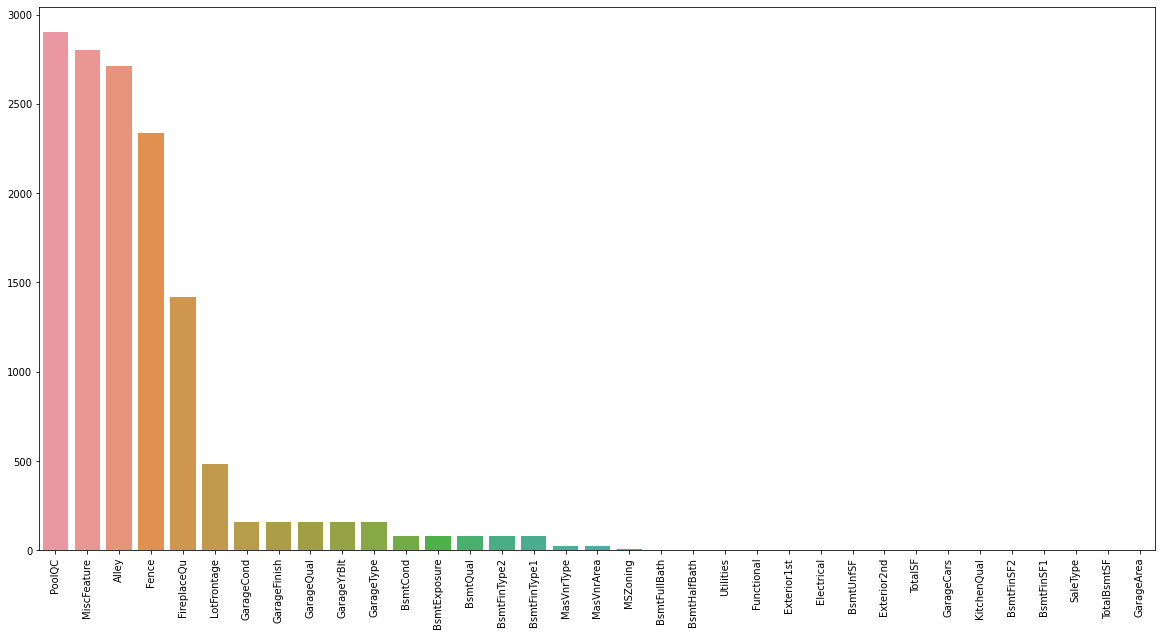

In [17]:
#欠損値の数をグラフ化
plt.figure(figsize=(20,10), facecolor="w")
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)

PoolQC: Pool quality

備え付けられているプールの質を表す。プールがない場合にはNAとなる。

MiscFeature: Miscellaneous feature not covered in other categories

そのほかの備え付けられている設備を表す。エレベータやテニスコートなど。特にない場合はNAとなる。

Alley: Type of alley access to property

物件にアクセスするための道の種類（砂利なのか舗装されているのか）を表す。該当しない場合はNAとなる。

Fence: Fence quality
フェンスの質を表す。フェンスがない場合はNAとなる。

FireplaceQu: Fireplace quality

暖炉の品質を表す。暖炉がない場合はNAとなる。

LotFrontage: Linear feet of street connected to property

物件に連接した道路の長さ。

MSSubClass: ldentifies the type of dwelling involved in the sale

住宅の種類を表す。数値はどの種類に当てはまるかを表すだけで大きさや順序に意味はない。

YrSold: Year Sold(YYYY)

販売年

MoSold: Month Sold(MM)

販売月

In [18]:
# 欠損値があるカラムをリスト化
na_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

#欠損があるカラムのデータ型を確認
all_data[na_col_list].dtypes.sort_values()

GarageArea      float64
TotalBsmtSF     float64
TotalSF         float64
BsmtFinSF1      float64
BsmtFinSF2      float64
GarageYrBlt     float64
BsmtFullBath    float64
BsmtHalfBath    float64
GarageCars      float64
BsmtUnfSF       float64
MasVnrArea      float64
LotFrontage     float64
GarageType       object
KitchenQual      object
MasVnrType       object
MiscFeature      object
PoolQC           object
SaleType         object
MSZoning         object
GarageQual       object
Alley            object
GarageCond       object
Functional       object
FireplaceQu      object
Fence            object
Exterior2nd      object
Exterior1st      object
Electrical       object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
GarageFinish     object
Utilities        object
dtype: object

float型の場合は0、objectの場合は"None"で置換する。

隣接した道路の長さに関しては同じ地区の中央値を取る。

In [19]:
#隣接した道路の長さ（LotFrontage）の欠損値の補完
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#欠損値が存在するかつfloat型のリストを作成
float_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "float64"].index.tolist()

#欠損値が存在するかつobject型のリストを作成
obj_list = all_data[na_col_list].dtypes[all_data[na_col_list].dtypes == "object"].index.tolist()

#float型の場合は欠損値を0で置換
all_data[float_list] = all_data[float_list].fillna(0)

#object型の場合は欠損値を"None"で置換
all_data[obj_list] = all_data[obj_list].fillna("None")

#欠損値が全て置換できているか確認
all_data.isnull().sum()[all_data.isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
# カテゴリ変数に変換する
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

探索的データ分析で目的変数であるSalesPriceが正規分布になっていなかったため、正規分布に変換する。

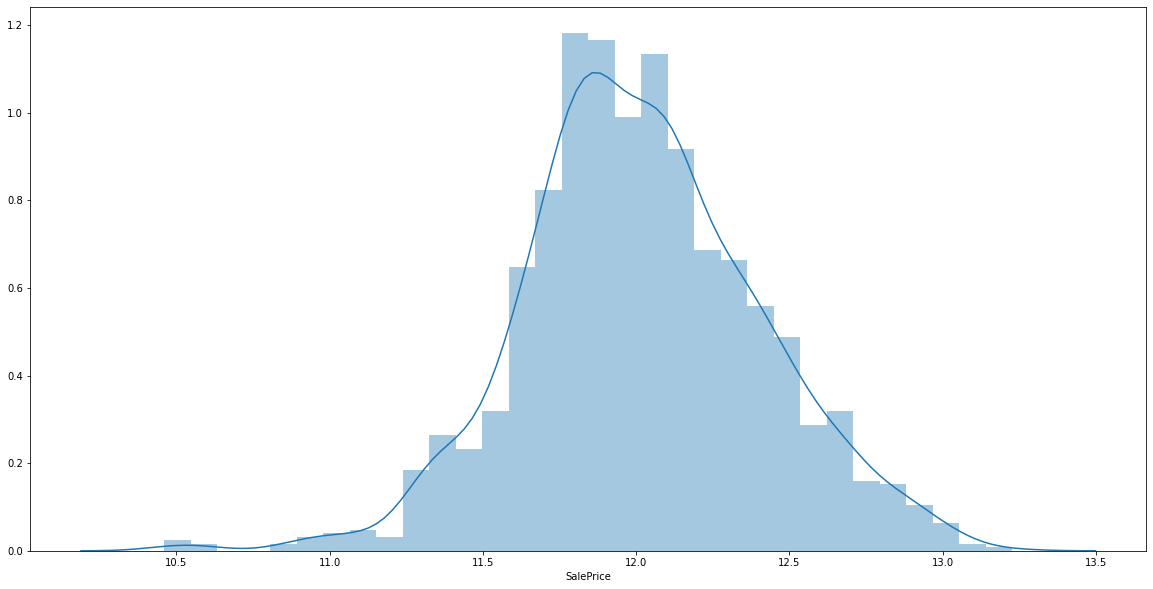

In [21]:
#目的変数の対数log(x+1)をとる
train_y = np.log1p(train_y)

#分布を可視化
plt.figure(figsize=(20, 10))
sns.distplot(train_y)

歪度：左に偏った分布のときは正の値、右に偏った分布の場合は負の値を取る。

尖度：正規分布より尖った分布（データが平均付近に集中）んのときは正の値、正規分布より扁平な分布（データが平均付近から散らばる）のときは負の値を取る。

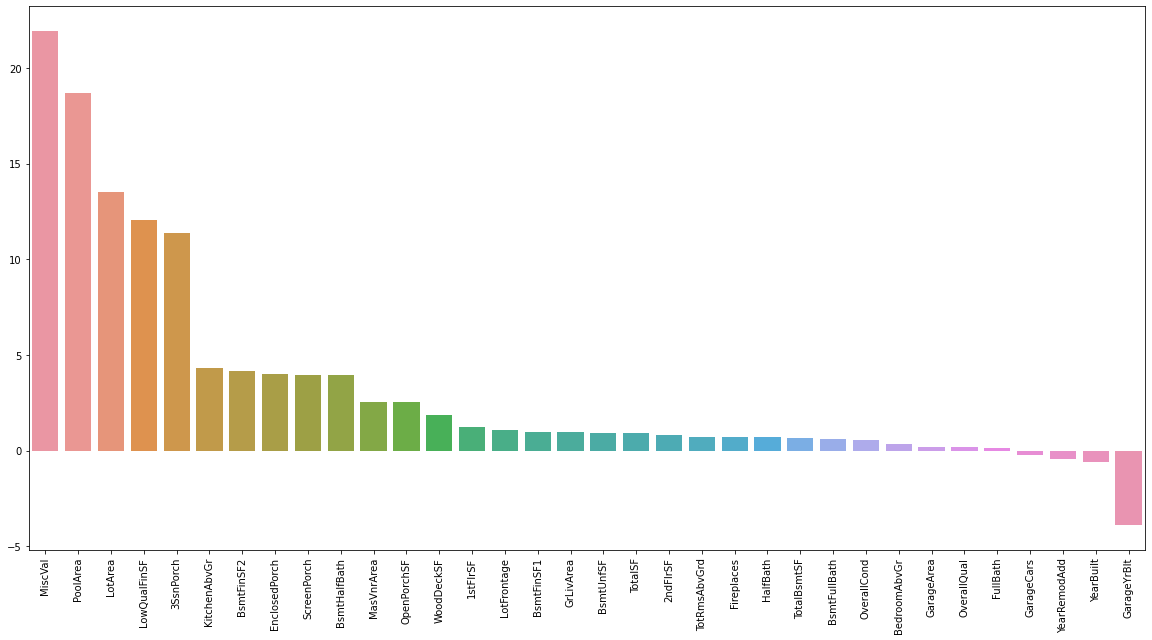

In [22]:
#数値の説明変数のリストを作成
num_feats = all_data.dtypes[all_data.dtypes != "object" ].index

#各説明変数の歪度を計算
skewed_feats = all_data[num_feats].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10), facecolor="w")
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats.index, y=skewed_feats)

歪度の閾値は0.5として、それよりも歪度が大きいものは対数変換する。

In [23]:
#歪度の絶対値が0.5より大きい変数だけに絞る
skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

#各変数の最小値を表示
for i in skewed_feats_over:
    print(min(all_data[i]))

0
0
1300
0
0
0
0.0
0
0
0.0
0.0
0
0
334
21.0
0.0
334
0.0
0.0
0
2
0
0
0.0
0.0
1
1872
0.0


Box-Cox変換とは、変数のスケールを変えて分布を正規分布（ガウス分布）の形に変える変換。

Box-Cox変換は0以下の値を取る変数には使用できないため、0以下の値を持つ変数にも適用可能なYeo-Johnson変数を使用

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


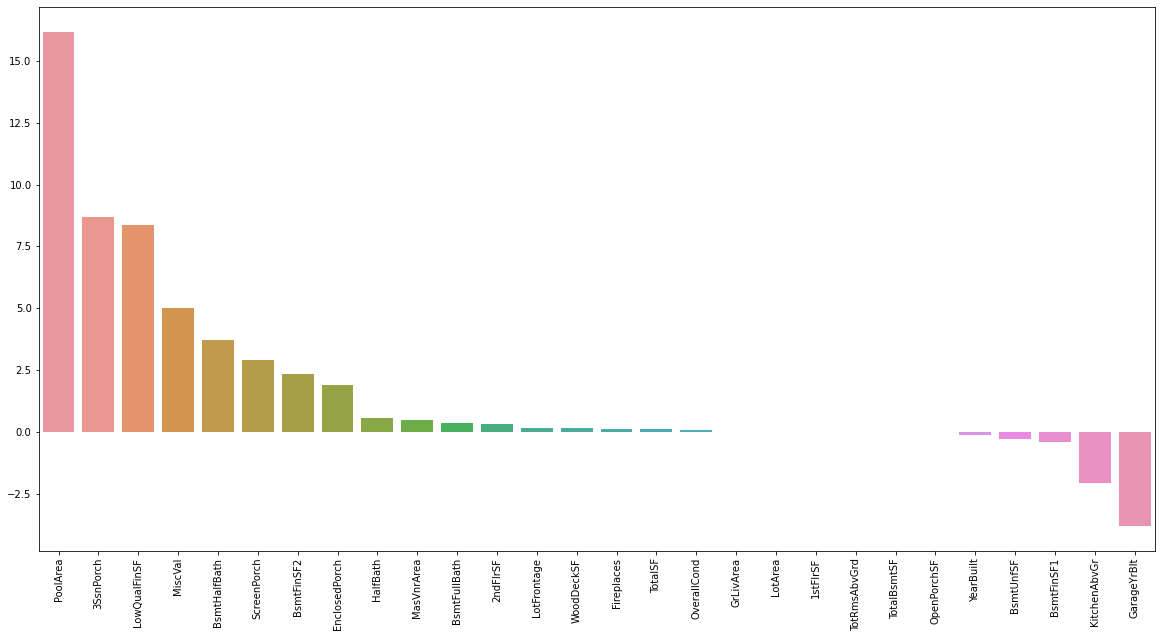

In [24]:
#Yeo-Johnson変換
pt = PowerTransformer()
pt.fit(all_data[skewed_feats_over])

#変換後のデータで各列を置換
all_data[skewed_feats_over] = pt.transform(all_data[skewed_feats_over])

#各説明変数の歪度を計算
skewed_feats_fixed = all_data[skewed_feats_over].apply(lambda x: x.skew()).sort_values(ascending = False)

#グラフ化
plt.figure(figsize=(20,10), facecolor="w")
plt.xticks(rotation='90')
sns.barplot(x=skewed_feats_fixed.index, y=skewed_feats_fixed)

物件の面積を部屋数で割った1部屋あたりの面積という特徴量を追加することで、精度が上がるらしい。

In [25]:
#特徴量に1部屋あたりの面積を追加
all_data["FeetPerRoom"] =  all_data["TotalSF"]/all_data["TotRmsAbvGrd"]

#その他有効そうなものを追加する

#建築した年とリフォームした年の合計
all_data['YearBuiltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

#バスルームの合計面積
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

#縁側の合計面積
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

#プールの有無
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

#2階の有無
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

#ガレージの有無
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#地下室の有無
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#暖炉の有無
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
#各カラムのデータ型を確認
all_data.dtypes.value_counts()

object     46
float64    34
int64       9
dtype: int64

In [27]:
#カテゴリ変数となっているカラムを取り出す
cal_list = all_data.dtypes[all_data.dtypes=="object"].index.tolist()

#学習データにおけるカテゴリ変数のデータ数を確認
train_x[cal_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Alley          91 non-null     object
 1   BldgType       1449 non-null   object
 2   BsmtCond       1412 non-null   object
 3   BsmtExposure   1411 non-null   object
 4   BsmtFinType1   1412 non-null   object
 5   BsmtFinType2   1411 non-null   object
 6   BsmtQual       1412 non-null   object
 7   CentralAir     1449 non-null   object
 8   Condition1     1449 non-null   object
 9   Condition2     1449 non-null   object
 10  Electrical     1448 non-null   object
 11  ExterCond      1449 non-null   object
 12  ExterQual      1449 non-null   object
 13  Exterior1st    1449 non-null   object
 14  Exterior2nd    1449 non-null   object
 15  Fence          280 non-null    object
 16  FireplaceQu    759 non-null    object
 17  Foundation     1449 non-null   object
 18  Functional     1449 non-null

In [28]:
#カテゴリ変数をLabelEncoderにする
# 文字列をラベル化した数値に変換する為のライブラリをインポート
from sklearn.preprocessing import LabelEncoder

# この時点でカテゴリ変数を標準化する列を指定しておく
# この時点のint64とfloat64をすべて指定、列名のみ取得

# データタイプがobjectの列の値をラベル化した数値に変換
for i in range(all_data.shape[1]):
    if all_data.iloc[:,i].dtypes == object:
        le = LabelEncoder()
        # iloc関数でobject列の全ての行の値をleに学習,(values:値,column:列,index:行)
        #le.fit()で変換したいデータを指定、le.transform()で数値へ変換
        le.fit(list(all_data.iloc[:,i].values))
        all_data.iloc[:,i] = le.transform(list(all_data.iloc[:,i].values))

#サイズを確認
all_data.shape

(2908, 89)

In [29]:
#学習データとテストデータに再分割
train_x = all_data.iloc[:train_x.shape[0],:].reset_index(drop=True)
test_x = all_data.iloc[train_x.shape[0]:,:].reset_index(drop=True)

#サイズを確認
print("train_x: "+str(train_x.shape))
print("test_x: "+str(test_x.shape))

train_x: (1449, 89)
test_x: (1459, 89)


In [30]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

{'TotalSF': 973, 'OverallQual': 519, 'YearBuiltAndRemod': 712, 'GrLivArea': 1059, 'Total_Bathrooms': 477, 'OverallCond': 569, 'Exterior2nd': 441, 'GarageCars': 142, 'GarageYrBlt': 570, '2ndFlrSF': 1371, 'BsmtCond': 159, 'YearBuilt': 677, 'KitchenAbvGr': 39, 'BsmtFinType2': 75, 'FeetPerRoom': 1700, 'GarageArea': 981, 'Condition2': 1, 'Functional': 255, 'MSZoning': 265, 'PavedDrive': 43, 'GarageQual': 2, 'LotFrontage': 1202, 'SaleCondition': 540, 'BsmtFinSF1': 826, 'MSSubClass': 119, 'Total_porch_sf': 1372, 'EnclosedPorch': 414, 'BsmtUnfSF': 2696, 'BsmtFinType1': 544, 'GarageCond': 5, 'BsmtFinSF2': 379, 'Fireplaces': 157, 'KitchenQual': 51, 'Fence': 187, 'TotalBsmtSF': 645, 'YearRemodAdd': 638, 'BsmtHalfBath': 18, 'BsmtQual': 186, 'BedroomAbvGr': 397, 'ExterQual': 153, 'ExterCond': 146, 'BldgType': 180, 'Condition1': 78, 'MasVnrArea': 706, 'Foundation': 230, 'OpenPorchSF': 768, 'Neighborhood': 606, 'FireplaceQu': 251, 'HeatingQC': 264, 'MoSold': 755, 'WoodDeckSF': 473, 'BsmtExposure': 63

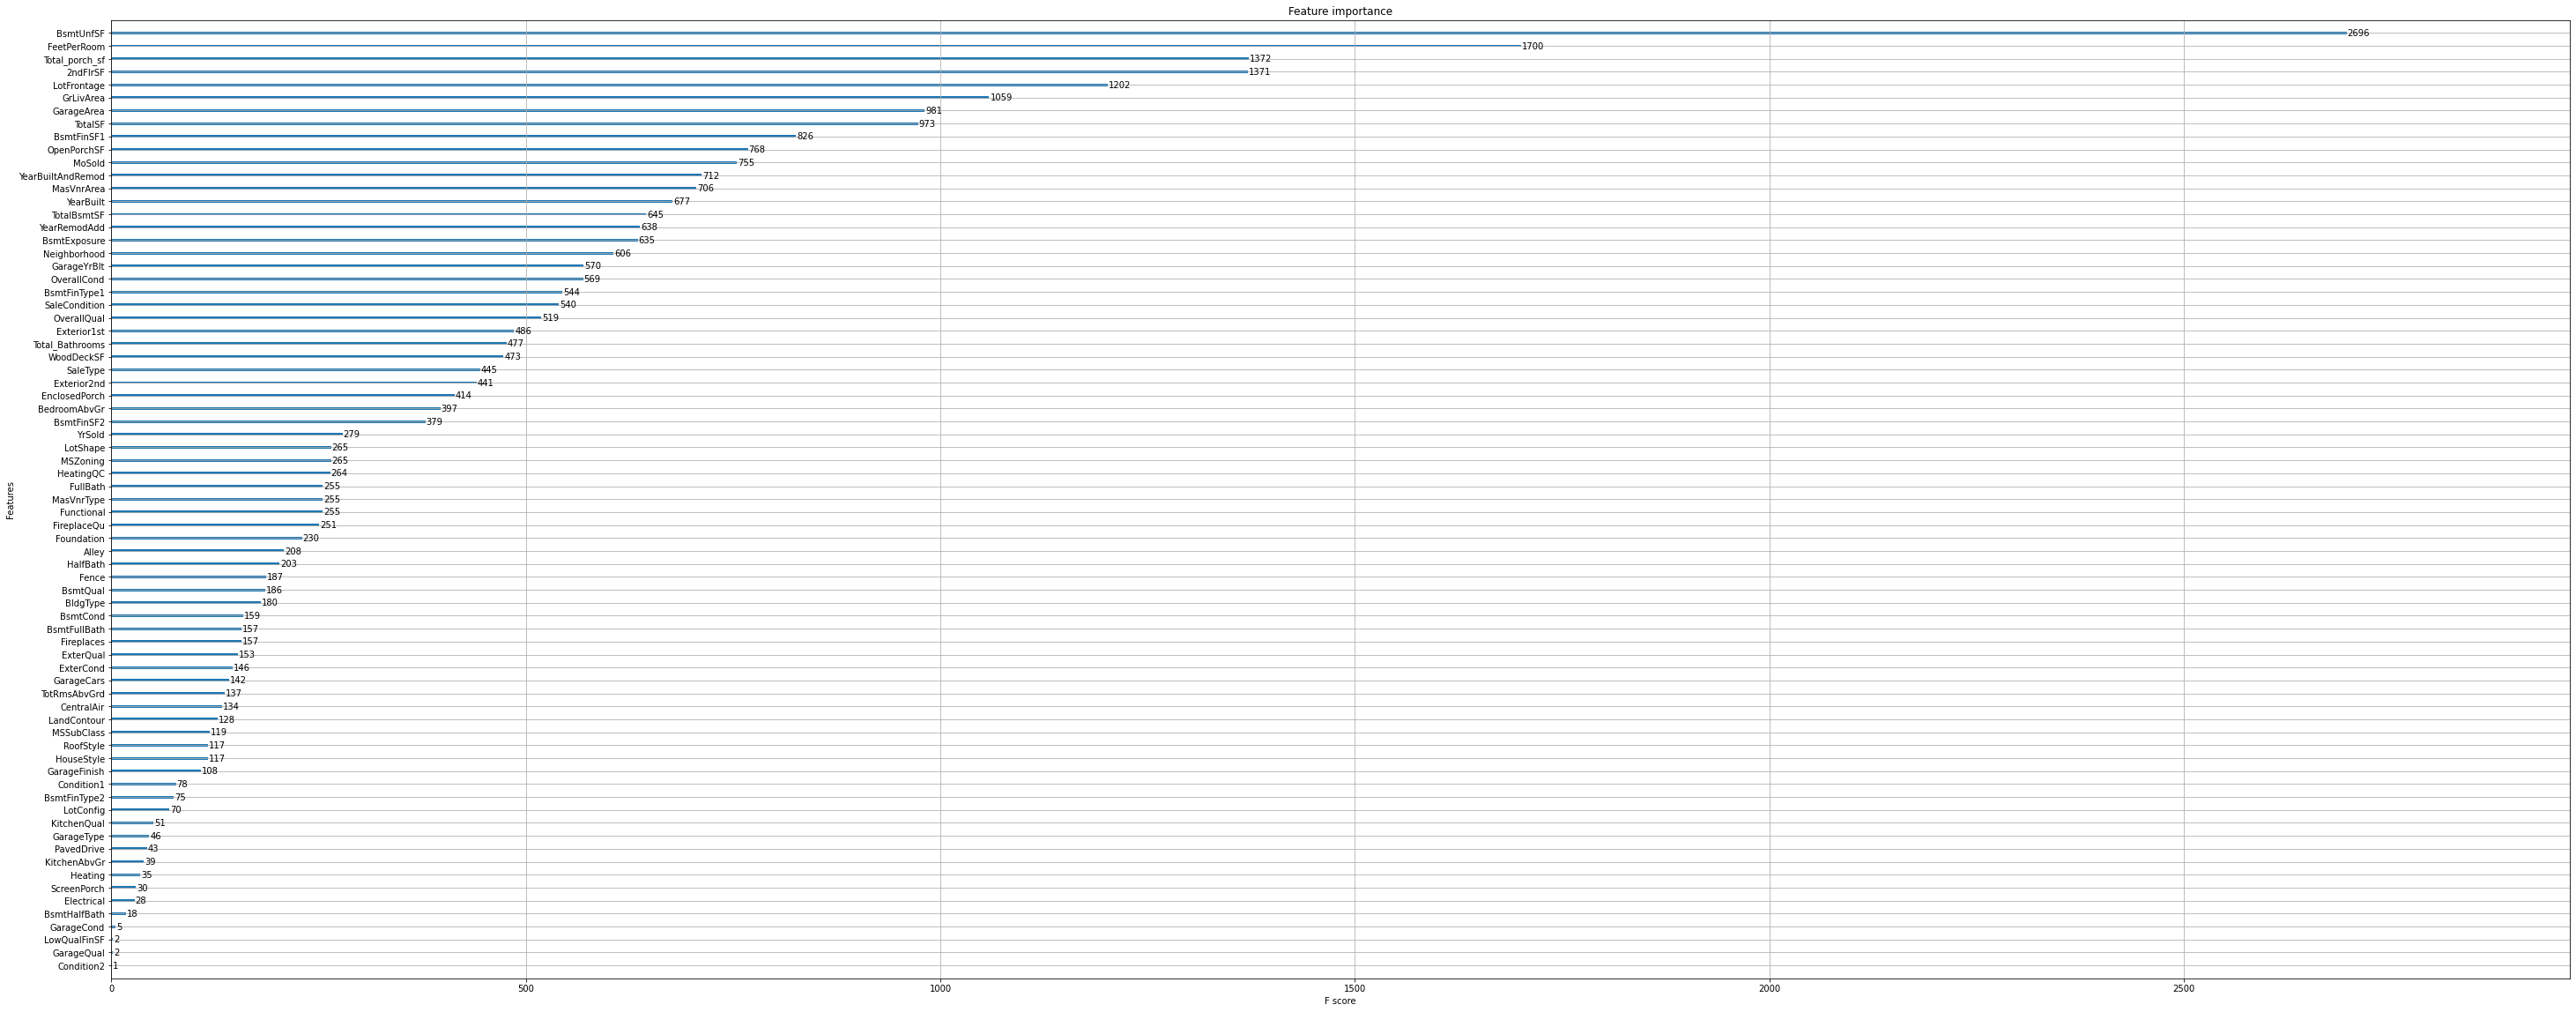

In [34]:
#LabelEncoderに変更した
import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

"""XGBoost で特徴量の重要度を可視化するサンプルコード"""


# データの分割
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
    param, dtrain,
    num_round,
    evallist,
    evals_result=evals_result,
    early_stopping_rounds=1000,
    verbose_eval=False
)


# pred = bst.predict(dvalid)
# acc = xgb.score(valid_y, pred)
# print("Accuracy : ", acc)

# Feature Importance の情報を持つ辞書を出力
print(bst.get_fscore())

# 性能向上に寄与する度合いで重要度をプロットする
_, ax = plt.subplots(figsize=(50,20))
xgb.plot_importance(bst, ax=ax)
plt.show()

In [ ]:
dtest = xgb.DMatrix(test_x)
test1 = pd.DataFrame()
test1["Id"] = test_ID
test1["SalePrice"] = np.exp(bst.predict(dtest))
test1.to_csv('test1.csv', index=False)

In [ ]:
# データの分割
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

GBDT（勾配ブースティング木）によるモデル作成

In [ ]:
#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
    param, dtrain,
    num_round,
    evallist,
    evals_result=evals_result,
    early_stopping_rounds=1000,
    verbose_eval=False
)

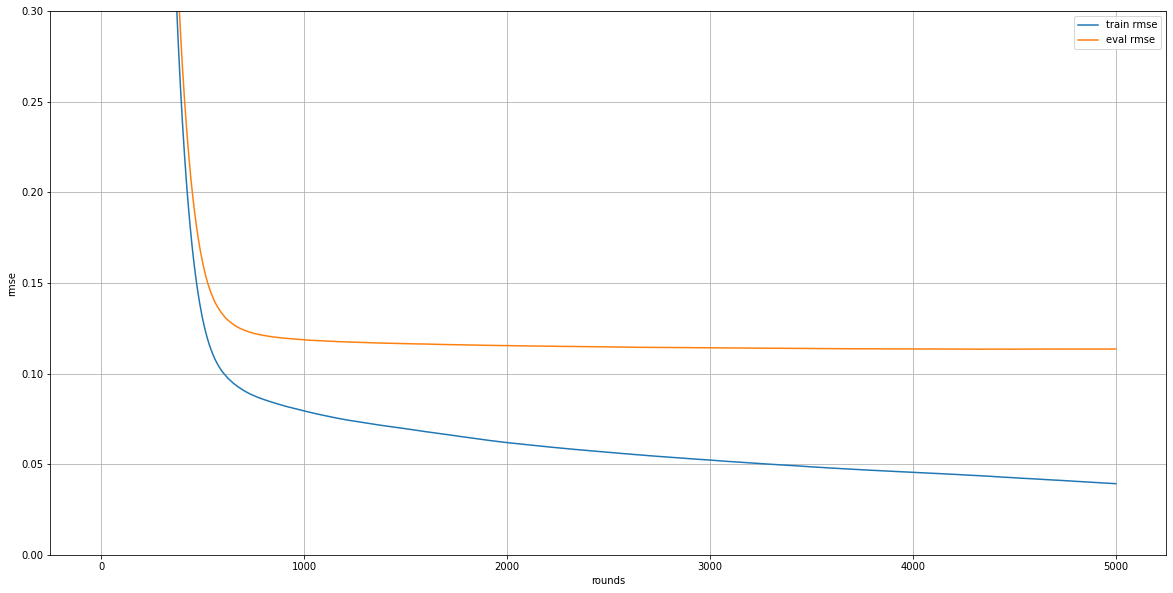

In [ ]:
#学習曲線を可視化する
plt.figure(figsize=(20, 10), facecolor="w")
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.ylim(0, 0.3)
plt.show()

{'TotalSF': 861, 'OverallQual': 340, 'Functional_Maj2': 38, 'GrLivArea': 1011, 'ExterQual_TA': 19, 'GarageCars': 28, 'Condition1_Artery': 210, 'FeetPerRoom': 1400, 'OverallCond': 309, 'YearRemodAdd': 465, 'BldgType_1Fam': 48, 'GarageYrBlt': 1028, 'Exterior2nd_CmentBd': 1, 'YearBuiltAndRemod': 244, 'MSSubClass_30': 57, 'KitchenAbvGr': 22, 'GarageArea': 1194, 'MSZoning_RM': 12, 'Neighborhood_Somerst': 79, 'LotFrontage': 500, 'Total_Bathrooms': 289, 'Fireplaces': 250, 'Exterior1st_CemntBd': 2, 'Functional_Typ': 184, 'MSZoning_RL': 16, 'Exterior1st_Plywood': 54, 'YearBuilt': 603, 'GarageCond_TA': 10, 'MoSold_1': 63, 'GarageCond_Fa': 3, 'Total_porch_sf': 866, 'MasVnrType_BrkFace': 54, 'FireplaceQu_Fa': 20, 'Neighborhood_Gilbert': 16, 'LotShape_IR1': 49, 'MasVnrArea': 905, 'SaleCondition_Normal': 86, 'TotalBsmtSF': 532, 'Foundation_PConc': 105, 'KitchenQual_Ex': 33, 'PavedDrive_Y': 8, 'SaleCondition_Abnorml': 189, 'ExterCond_Fa': 1, 'BldgType_Twnhs': 85, 'WoodDeckSF': 373, 'Neighborhood_Edwa

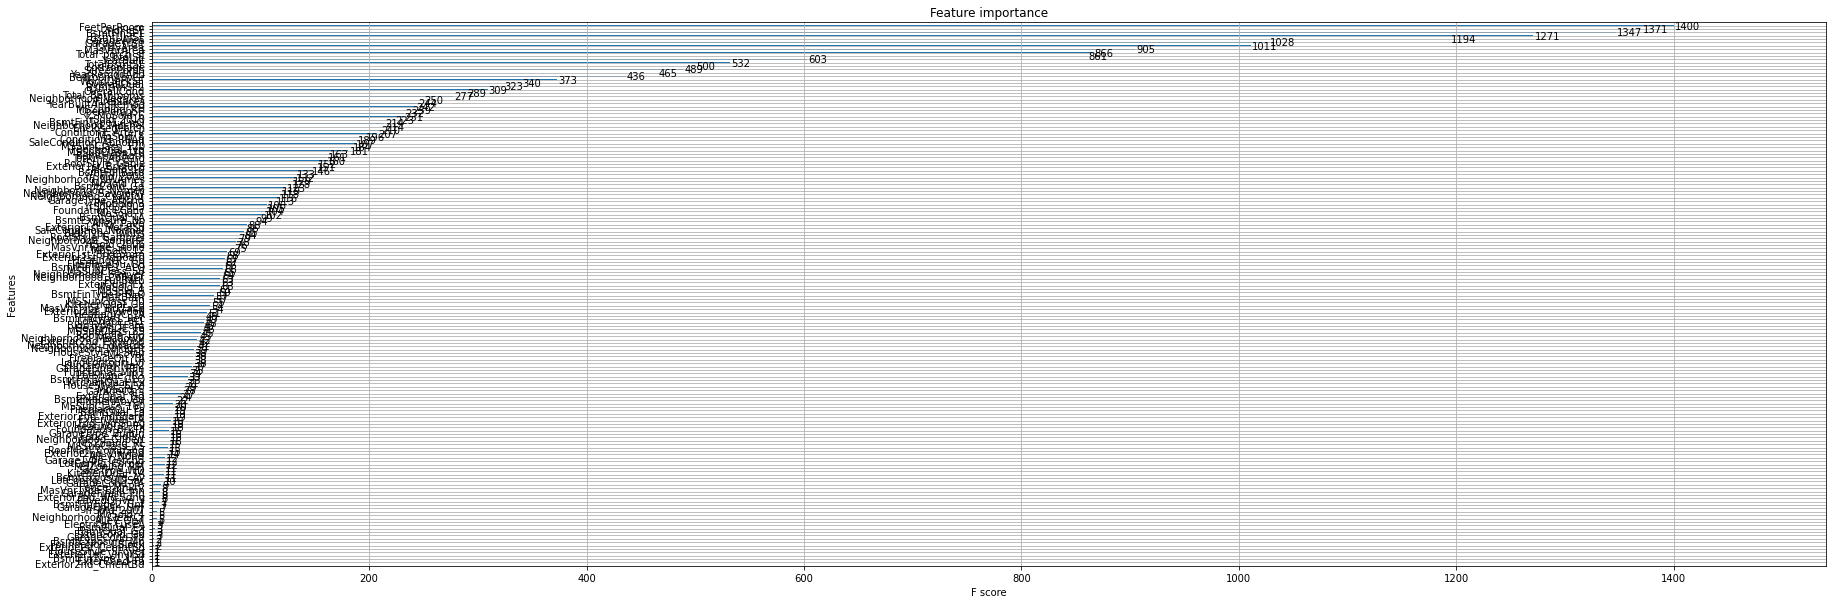

In [109]:
import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

"""XGBoost で特徴量の重要度を可視化するサンプルコード"""


# データの分割
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
    param, dtrain,
    num_round,
    evallist,
    evals_result=evals_result,
    early_stopping_rounds=1000,
    verbose_eval=False
)


# pred = bst.predict(dvalid)
# acc = xgb.score(valid_y, pred)
# print("Accuracy : ", acc)

# Feature Importance の情報を持つ辞書を出力
print(bst.get_fscore())

# 性能向上に寄与する度合いで重要度をプロットする
_, ax = plt.subplots(figsize=(30,10))
xgb.plot_importance(bst, ax=ax)
plt.show()

In [104]:
dtest = xgb.DMatrix(test_x)
test1 = pd.DataFrame()
test1["Id"] = test_ID
test1["SalePrice"] = np.exp(bst.predict(dtest))
test1.to_csv('test1.csv', index=False)

In [ ]:
  # 今日のやること
  # xgboostにおいて扱う特徴量を絞ったら(例えば上位30個の特徴量のみ使用)、精度に変化があるのか？を検証する
  # また前回はxgboostが学習してからじゃないとfeature importanceが出せないということが分かったので、どうしようか検討
  # 2つ方法があって学習させた後に特徴量を出す。
  # 学習させた後に重要な特徴量と相関を合わせ見て相関を見ても重要な特徴量が導出できそうか判断する。